# COGS 109 Modeling and Data Analysis - Assignment 2:  Linear Regression

The goal of this assignment is to be able to use the Python and run linear regression on advertising dataset.

In [ ]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import pandas as pd
####################### Put the dataset 'IceCreamConsumption.csv' in the same directory with the Assignment2 ######################
df = pd.read_csv(os.path.join('./','IceCreamConsumption.csv'))


In [3]:
df

,Ice_cream_consumption,Average_temperature,Price
0,0.270,41,0.386
1,0.282,56,0.374
2,0.277,63,0.393
3,0.280,68,0.425
4,0.272,69,0.406
...,...,...,...
25,0.265,33,0.359
26,0.265,41,0.376
27,0.265,52,0.416
28,0.268,64,0.437


Today, we are going to study if we can predict Ice cream consumption based on the price and the average temperature.

## Question 0.  Can you describe the dataset (what can you see from the dataset) ?

# TODO
There seems to be 30 different rows of data recorded with three columns, ice cream consumption, price and average temperature. Each row of data corresponds to 3 attributes, the three columns mentioned. In efforts to predict ice cream consumption based on the price and average temperature, this dataset will be used for a linear regression model using ols instead of sklearn. 
A trend I noticed prior to applying linear regression is that higher temperatures correlate with an increase in ice cream price although the ice cream consumption tends to vary in value.

## Question 1.  How are the different variables correlated?

In [4]:
df.corr()

,Ice_cream_consumption,Average_temperature,Price
Ice_cream_consumption,1.000000,-0.108206,-0.259594
Average_temperature,-0.108206,1.000000,0.775625
Price,-0.259594,0.775625,1.000000


Answer: 
Data shows that the variables with positive correlation happened to be average_temperature and Price with 0.78 which means as temperature increases so does the price. Where as average_temperature and ice-cream_consumption had a negative correlation of -0.11, the closer to 0 represents no correlation. Lastly, Ice-cream consumption and price have a negative correlation with -0.26, this means that as ice cream consumption increases, price slightly declines. 

## Question 2.  Draw a scatter plot between `Average temperature` (horizontal axis) and `Ice cream consumption` (vertical axis).

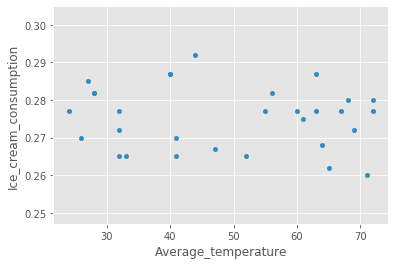

In [5]:
df.plot(kind = 'scatter', x = 'Average_temperature', y = 'Ice_cream_consumption')

## Question 3.  Draw a scatter plot between `Average temperature` (horizontal axis) and `Price` (vertical axis).

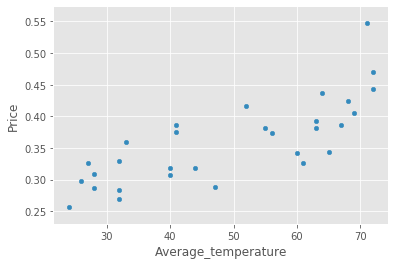

In [6]:
# TODO
df.plot(kind = 'scatter', x = 'Average_temperature' , y = 'Price')

## Question 4.  Estimate a simple linear regression between `Average temperature` and `Ice cream consumption` (response variable).

In [7]:
model = smf.ols(formula = 'Ice_cream_consumption ~ Average_temperature', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Ice_cream_consumption   R-squared:                       0.012
Model:                               OLS   Adj. R-squared:                 -0.024
Method:                    Least Squares   F-statistic:                    0.3317
Date:                   Fri, 10 Jul 2020   Prob (F-statistic):              0.569
Time:                           19:31:28   Log-Likelihood:                 101.71
No. Observations:                     30   AIC:                            -199.4
Df Residuals:                         28   BIC:                            -196.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2780      0.005     56.355      0.000       0.268       0.288
Average_temperature -5.497e-05   9.54e-05     -0.576      0.569      -0.000       0.000
==============================================================================
Omnibus:                        2.153   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.176
Skew:                          -0.018   Prob(JB):                        0.556
Kurtosis:                       2.031   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ## Question 5.  Interpret the coefficients.  Are they significant?  What equation did you derive?

#Answer: 
The coefficients are parameter estimates obtained once the model is applied to the data and visible in the ols chart. 
These coefficients are necessary to obtain the best fit line for the linear regression model. The coefficients are interpreted as such,
the y-intercept(0.2780) predicts for Ice_cream_consumption if Average_temperature was 0 or near 0.
For coefficients belonging to predictor variables such as Average_temperature(-5.97e-05), the coefficient represents the difference in the predicted value of Ice_Cream_Consumption for each one-unit difference in Average_temperature.  

Equation: Our simple linear regression is: `Ice_cream_consumption = 0.2780 - 5.497e-05 * Average_temperature`.  

 ## Question 6.  How are the residual distributed?  Do they follow the linear modeling assumptions?

In [8]:
model.resid.mean()

-1.1102230246251566e-17

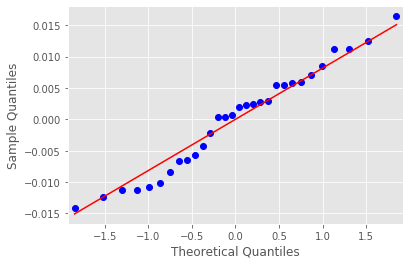

In [9]:
sm.qqplot(model.resid, line = 's')

pass

Answer: The residuals have mean of 0.  The residuals also follow a normal distribution (since the points in the q-q plot fall approximately along the reference line against another normal distribution).  residuals ~ N(0, .) which is an assumption for the linear regression model.

 ## Question 7.  Run a multiple linear regression using `Average temperature`, `Price`, and `Ice cream consumption` as explanatory variables.

In [10]:
model = smf.ols(formula = 'Ice_cream_consumption ~ Average_temperature + Price', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Ice_cream_consumption   R-squared:                       0.089
Model:                               OLS   Adj. R-squared:                  0.022
Method:                    Least Squares   F-statistic:                     1.322
Date:                   Fri, 10 Jul 2020   Prob (F-statistic):              0.283
Time:                           19:31:30   Log-Likelihood:                 102.93
No. Observations:                     30   AIC:                            -199.9
Df Residuals:                         27   BIC:                            -195.7
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2896      0.009     32.071      0.000       0.271       0.308
Average_temperature     0.0001      0.000      0.803      0.429      -0.000       0.000
Price                  -0.0559      0.037     -1.515      0.141      -0.132       0.020
==============================================================================
Omnibus:                        0.984   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.821
Skew:                          -0.076   Prob(JB):                        0.663
Kurtosis:                       2.204   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## In the following questions we will use the advertising dataset:

In [11]:
#################### First is to import and read the advertising dataset

import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv(os.path.join('./','advertising.csv'))

In [12]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


We have 198 observations in this outlier-free dataset. Each observation records the budget used to run ads on TV, on radio, and in the newspapers (in thousands of dollars) as well as the sale figures (in thousands of units).
Today, we are going to study if we can predict sales based on the amount of advertising.

## Question 8.  How are the different variables correlated?

In [13]:
# TODO
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


If we make Sales the response variable and correlate each variable, TV has the highest correlation with 0.78, followed by Radio with 0.58, and lastly Newspaper with 0.22. Radio and Newspaper had a positive correlation as well with 0.35 followed by the other positively correlated variables with a value less than or equal to 0.05. No variables had a negative correlation meaning that no advertising strategy affects sales negatively although other strategies are more effective than others(in this case TV). Correlation doesn't determine causation so we must proceed and apply a simple linear regression model. 


## Question 9.  Draw a scatter plot between `TV` (horizontal axis) and `Sales` (vertical axis).

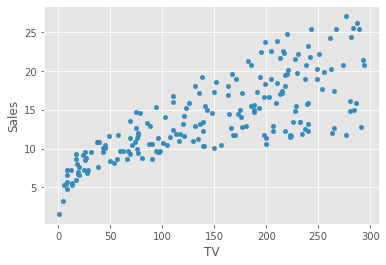

In [14]:
# TODO
df.plot(kind = 'scatter', x = 'TV', y = 'Sales')

## Question 10. Estimate a simple linear regression between TV (explanatory variable) and Sales (response variable).

In [15]:
# TODO
model = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.29e-41
Time:                        19:31:32   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000       6.120       7.942
TV             0.0474      0.003     17.400      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Simple Linear Regression equation is `Sales = 7.0306 + 0.0474 * (TV)`.